In [17]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml

In [18]:
# Step 1: Read the FashionMNIST dataset
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


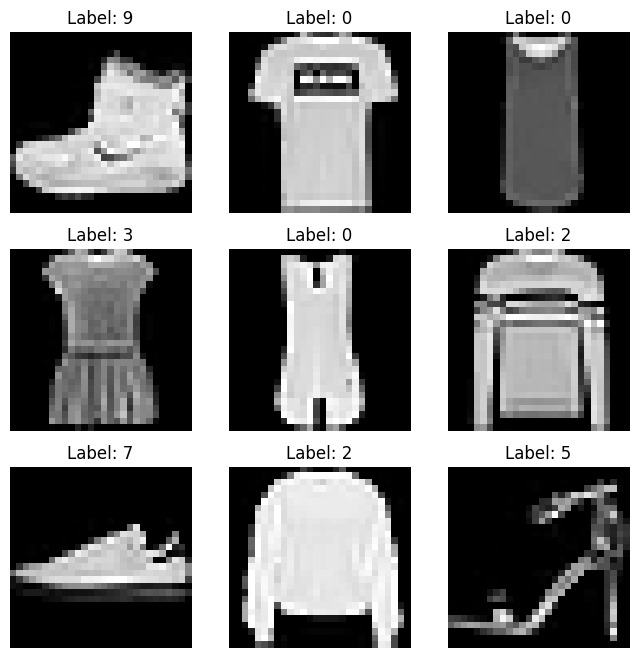

In [19]:
# Step 2: Preprocess the data
# Display a sample of the data
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y[i]}')
plt.show()

In [20]:
# Step 4: Separate training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 3: Normalize the data and convert 28x28 matrix to 1x784
X_train = X_train.reshape((-1, 784)) / 255.0
X_test = X_test.reshape((-1, 784)) / 255.0

In [23]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [24]:
# Step 5: Train AdaBoost model
model = XGBClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training accuracy with model: {train_accuracy:.4f}')
print(f'Testing accuracy with model: {test_accuracy:.4f}')

Training accuracy with model: 0.9827
Testing accuracy with model: 0.8979


In [26]:
# Step 6: Cross-validation and error report
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
mean_cv_error = 1 - np.mean(cv_scores)
print(f'Cross-validation error: {mean_cv_error:.4f}')

Cross-validation error: 0.1074


In [27]:
# Step 7: Calculate accuracy and correctness on training and test data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Training accuracy: 0.9827
Test accuracy: 0.8979


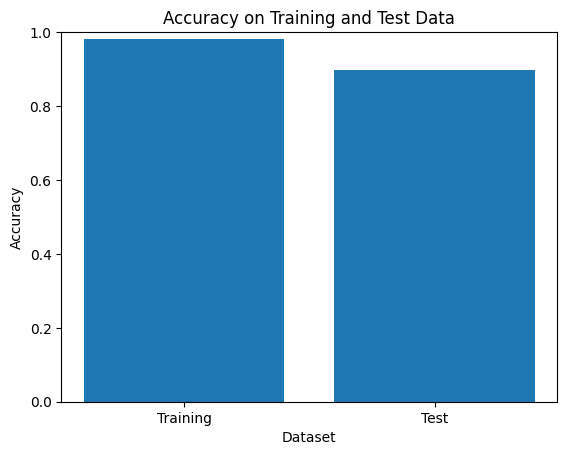

In [28]:
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy on Training and Test Data')
plt.ylim([0, 1.0])
plt.show()